### Regression Exercise 
# Moneyball The NBA
---

### This HW is not easy. TRY IT YOURSELF FIRST! 
Then If you are able to complete it, [watch this lecture series on it](https://ocw.mit.edu/courses/15-071-the-analytics-edge-spring-2017/pages/linear-regression/playing-moneyball-in-the-nba-recitation/video-1-the-data/). 

In [1]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd
import numpy as np

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt

# SKLEARN IS OUR MACHINE LEARNING PACKAGE
from sklearn.linear_model import LinearRegression

# IMPORT OUR RANDOM FOREST REGERSSOR
from sklearn.ensemble import RandomForestRegressor

# METRICS HELP US SCORE OUR MODEL
from sklearn import metrics

# HELP US SPLIT OUR DATA INTO TESTING A TRAINING
from sklearn.model_selection import train_test_split

# Good ol statsmodels
import statsmodels.api as sm

# Specific root mean squared error for stats models
from statsmodels.tools.eval_measures import rmse


from statsmodels.stats.outliers_influence import variance_inflation_factor


from statsmodels.api import qqplot

import CTPLIB as ctp


# Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.

# STEP 1 (i): Inspect and explore data
1. Use `data/NBA_test.csv and data/NBA_train.csv`

In [2]:
# READ IN THE DATA USING PANDAS 
df = pd.read_csv('data/NBA_train.csv')


# DISPLAY THE FIRST 5 ROWS
df.head()

,SeasonEnd,Team,Playoffs,W,PTS,oppPTS,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV
0,1980,Atlanta Hawks,1,50,8573,8334,3261,7027,3248,6952,13,75,2038,2645,1369,2406,1913,782,539,1495
1,1980,Boston Celtics,1,61,9303,8664,3617,7387,3455,6965,162,422,1907,2449,1227,2457,2198,809,308,1539
2,1980,Chicago Bulls,0,30,8813,9035,3362,6943,3292,6668,70,275,2019,2592,1115,2465,2152,704,392,1684
3,1980,Cleveland Cavaliers,0,37,9360,9332,3811,8041,3775,7854,36,187,1702,2205,1307,2381,2108,764,342,1370
4,1980,Denver Nuggets,0,30,8878,9240,3462,7470,3379,7215,83,255,1871,2539,1311,2524,2079,746,404,1533


```
SeasonEnd: Year season ended
Team: Name of team
Playoffs: If they made the playoffs. 1 == made to playoffs
W: Number of regular season in that season. 
PTS: Points scored in regular season. 
oppPTS: Opponent Points scored in regular season. 
FG: Field Goals made (total shots made == 2P and 3P combined)
FGA: Field Goals attempted (total shots attempted == 2P and 3P combined)
2P: two-pointers made
2PA: two-pointers attempted
3P: three-pointers made
3PA: three-pointers attempted
FT: Free-Throws made (not included in FG stat)
FTA: Free-Throws attempted (not included in FG stat)
ORB: Offensive Rebounds
DRB: Defensive Rebounds
AST: Assists made
STL: Steals 
BLK: Blocks 
TOV: Turnovers 
```

#### Inspect our data using `df.describe()` function.

In [3]:
# Inspect our data using `df.describe()` function.
df.describe

<bound method NDFrame.describe of      SeasonEnd                 Team  Playoffs   W   PTS  oppPTS    FG   FGA  \
0         1980        Atlanta Hawks         1  50  8573    8334  3261  7027   
1         1980       Boston Celtics         1  61  9303    8664  3617  7387   
2         1980        Chicago Bulls         0  30  8813    9035  3362  6943   
3         1980  Cleveland Cavaliers         0  37  9360    9332  3811  8041   
4         1980       Denver Nuggets         0  30  8878    9240  3462  7470   
..         ...                  ...       ...  ..   ...     ...   ...   ...   
830       2011     Sacramento Kings         0  24  8151    8589  3134  6979   
831       2011    San Antonio Spurs         1  61  8502    8034  3148  6628   
832       2011      Toronto Raptors         0  22  8124    8639  3144  6755   
833       2011            Utah Jazz         0  39  8153    8303  3064  6590   
834       2011   Washington Wizards         0  23  7977    8584  3048  6888   

       2P   2PA  

#### Check for Nulls.

In [6]:
# Check for Nulls.
df.isnull().sum()

SeasonEnd    0
Team         0
Playoffs     0
W            0
PTS          0
oppPTS       0
FG           0
FGA          0
2P           0
2PA          0
3P           0
3PA          0
FT           0
FTA          0
ORB          0
DRB          0
AST          0
STL          0
BLK          0
TOV          0
dtype: int64

#### Check for Duplicates

In [8]:
# Check for Duplicates
df.duplicated().sum()

0

#### Build a function that will INSPECT ANY DATAFRAME FOR YOU do this for you for any data frame you pass into it.

In [10]:
def inspect_dataframe(input_df):
    null = input_df.isnull().sum()
    duplicates = input_df.duplicated().sum()
    return "The number of nulls in the dataframe is ", null, "The number of duplicates in the dataframe is ", duplicates


inspect_dataframe(df)


('The number of nulls in the dataframe is ',
 SeasonEnd    0
 Team         0
 Playoffs     0
 W            0
 PTS          0
 oppPTS       0
 FG           0
 FGA          0
 2P           0
 2PA          0
 3P           0
 3PA          0
 FT           0
 FTA          0
 ORB          0
 DRB          0
 AST          0
 STL          0
 BLK          0
 TOV          0
 dtype: int64,
 'The number of duplicates in the dataframe is ',
 0)

#### Get a sense of how many wins it will take to make the playoffs. 
Make a scatter plot with x=Wins and the y=Team, and the hue=Playoffs

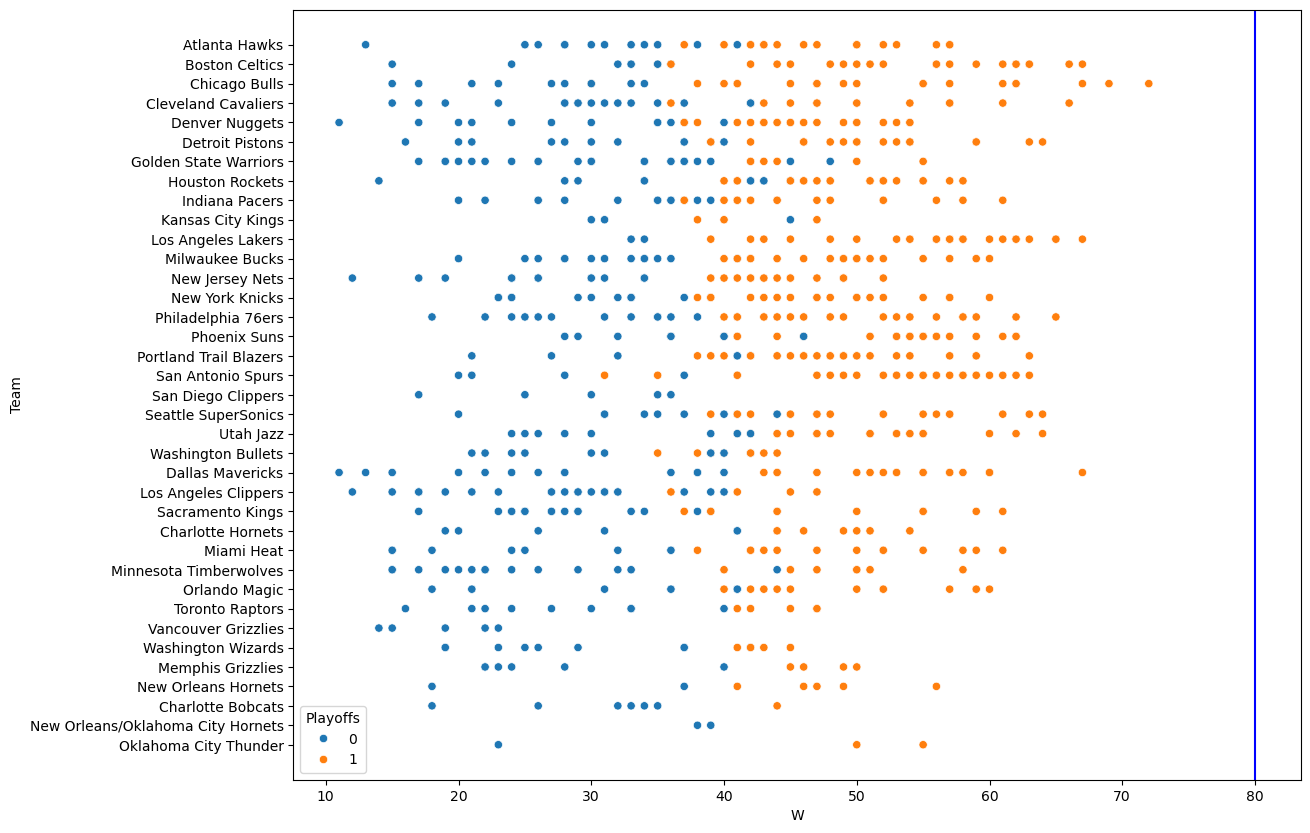

In [12]:
plt.figure(figsize=(13, 10))
ax = sns.scatterplot(df, x="W", y="Team", hue="Playoffs")
ax.axvline(x=80, color="blue")

#### Take a rough estimate, and now use that moving forward.  



In [90]:
WINS_NEED_TO_MAKE_PLAYOFFS = 43

---

# Now do moneyball but for the NBA. 

#### I would like you to do try and do this on your own first.  

It's not easy, but its fun af.  

There is a guided lecture on how to do this that I can send you, but I'd like for you to try and figure it out on your own first.  

If you are fully stuck, ask in slack how other people did it if that doesn't work (I highly encourage collorbration and learning from eachother.  I still consider that doing it on your own.)  

If that doesn't work, DM me and I will send you the lectures explaining how to do the whole thing.

# Rough Guide a v1 model.
0. Make a model to predict PTS 
0. For v1, dont use `2P, 3P, FG, or FT`.  Instead use `2PA, 3PA, FTA`.  
0. Include any other cols use see fit.  


In [14]:
X = df[['2PA', '3PA', 'FTA']]
y = df['PTS']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

y_pred = model.predict(X) 

r_squared = metrics.r2_score(y, y_pred).round(2)

model_root_mean_squared_error = rmse(y, y_pred).round(3)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     1050.
Date:                Fri, 25 Oct 2024   Prob (F-statistic):          3.63e-282
Time:                        17:46:06   Log-Likelihood:                -5844.7
No. Observations:                 835   AIC:                         1.170e+04
Df Residuals:                     831   BIC:                         1.172e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1436.9955    230.032     -6.247      0.0